In [49]:
import pandas as pd
from numpy import unique

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv',header = None)
print(df.nunique().head(5))

0    238
1    297
2    927
3    933
4    179
dtype: int64


In [50]:
print(df.shape)

(937, 50)


In [51]:
#this step is to delete colomns with zero variance 
counts = df.nunique()
to_del = [i for i , v in enumerate(counts) if v == 1]
print(to_del)

[22]


In [52]:
#if we dont mention Axis here, a row will be removed
df.drop(to_del,axis=1, inplace=True)
print(df.shape)

(937, 49)


In [53]:
counts = df.nunique()
dele = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) <1]
print(dele)
df.drop (dele, axis =1 , inplace = True)
print(df.shape)

[21, 23, 24, 25, 31, 35, 37, 38, 44, 48]
(937, 39)


#### Variance treshold

In [57]:
import pandas as pd
import numpy as np
from numpy import unique
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv',header = None)

In [58]:
dt = df.values
X = dt[:,:-1]
y= dt[:,-1]
print (X.shape, y.shape)

(937, 49) (937,)


>Treshold=0.00, Features=48
>Treshold=0.10, Features=36
>Treshold=0.20, Features=35
>Treshold=0.30, Features=35
>Treshold=0.40, Features=35
>Treshold=0.50, Features=31


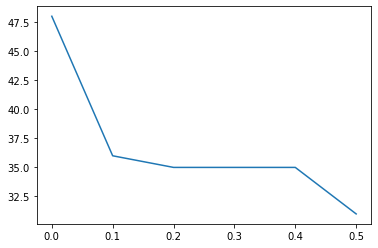

In [73]:
from numpy import arange
tresholds = arange(0.0,0.6,0.1)
results = list()
for t in tresholds:
    process = VarianceThreshold(threshold=t)
    X_new = process.fit_transform(X)
    n_features = X_new.shape[1]   #X_new features 
    print('>Treshold=%.2f, Features=%d' %(t,n_features))
    results.append(n_features)

pyplot.plot(tresholds, results)
pyplot.show()
# the line plot of variance thresholds and number of features selected

In [75]:
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(937, 50)
(937, 50)


In [36]:
data.shape[0] #rows
data.shape[1] #columns

50

In [15]:
from numpy import loadtxt
data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter= ',')

In [17]:
#this code prints the number of each unique value in a column
for i in range (data.shape[1]):
    print (i, len(unique(data[:,i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [38]:
#for now we cant make decision wether variables with less unique values must be removed or not, in this case
#we will check the percentage of each unique value in percentage to total unique values. 
for i in range(data.shape[1]):
    num = len(unique(data[:,i]))
    percentage = float(num)/ data.shape[0]*100
    if percentage <1:
        print('%d %d, %.1f%%' % (i,num,percentage))

21 9, 1.0%
22 1, 0.1%
24 9, 1.0%
25 8, 0.9%
26 9, 1.0%
32 4, 0.4%
36 3, 0.3%
38 9, 1.0%
39 9, 1.0%
45 2, 0.2%
49 2, 0.2%
